<font size=6>Area under the reciver operating characteristics curve

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
n=10000
ratio=0.95
n_0= int((1-ratio)*n)
n_1= int(ratio*n)
print(n_0, n_1)

500 9500


In [3]:
y = np.array([0]*n_0 + [1]*n_1) # Creating an array with 500 '0' and 9500 '1'


In [4]:
y_prob = np.array([1]*n)  # the probabilities obtained from a hypothetical model that always predicts the majority class
                          # probability of predicting class 1 is going to be 100%
y_pred = y_prob > 0.5

In [5]:
accuracy_score(y, y_pred)

0.95

In [6]:
cf_mat = confusion_matrix(y, y_pred)
print(cf_mat)

[[   0  500]
 [   0 9500]]


In [7]:
print("class 0 accuracy: ", cf_mat[0][0]/n_0)
print("class 1 accuracy: ", cf_mat[1][1]/n_1)

class 0 accuracy:  0.0
class 1 accuracy:  1.0


<font size=6># below are the probabilities obtained from a hypothetical model that doesn't always predict the mode


In [8]:
y_prob_2= np.array(
    np.random.uniform(0,0.7,n_0).tolist()+
    np.random.uniform(0.3,1,n_1).tolist()
)
y_pred_2= y_prob_2 > 0.5

print(accuracy_score(y, y_pred_2))
cf_mat = confusion_matrix(y, y_pred_2)
print(cf_mat)
print('class 0 accuracy: ', cf_mat[0][0]/n_0)
print('class 1 accuracy: ', cf_mat[1][1]/n_1)


0.712
[[ 363  137]
 [2743 6757]]
class 0 accuracy:  0.726
class 1 accuracy:  0.7112631578947368


In [9]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

0.5


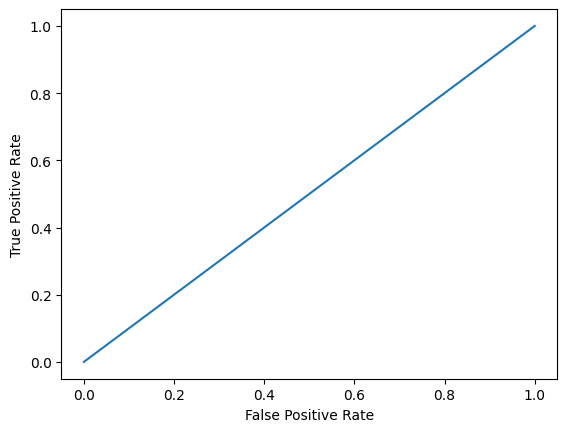

In [10]:
#Model 1:
plot_roc_curve(y, y_prob)
print(roc_auc_score(y, y_prob))

0.8335261052631578


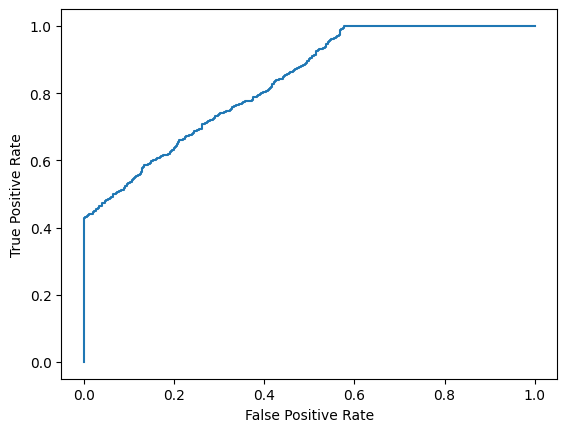

In [11]:
#Model 2:
plot_roc_curve(y, y_prob_2)
print(roc_auc_score(y, y_prob_2))

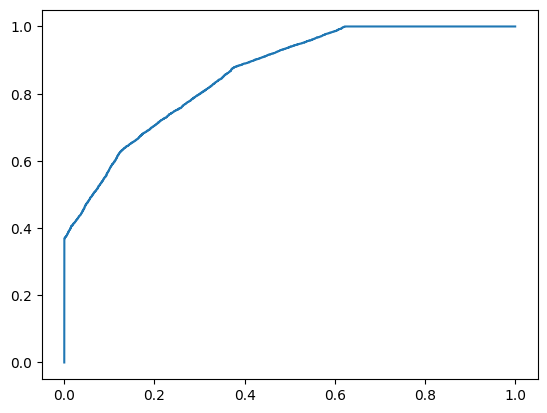

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
y = np.array([0] * n + [1] * n)
# 
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() + 
    np.random.uniform(.3, .7, n).tolist() + 
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() + 
    np.random.uniform(.3, .7, n).tolist() + 
    np.random.uniform(.6, 1, n//2).tolist()
)

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)